In [1]:
%matplotlib widget
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
from causalgraphicalmodels import CausalGraphicalModel

ModuleNotFoundError: No module named 'ipympl'

#### 2. El modelo de Ingreso-Gasto Keynesiano:

La ecuación de equilibrio para el Ingreso Agregado se deriva de la condición de equilibrio donde el ingreso es igual a la demanda agregada: $DA = Y$:

$$ DA = C + I + G + X - M $$

Donde:

$$ C = C_0 + bY^d $$
$$ I = I_0 - hr $$
$$ G = G_0 $$
$$ X = X_0 $$
$$ M = mY^d $$

$$ Y^d = 1 - t $$

Entonces: 

$$ DA = C_0 + I_0 + G_0 + X_0 - hr + Y(b - m)(1 - t) $$

De forma corta:

$$ DA = α_0 + α_1Y $$

Donde $ α_0 = (C_0 + I_0 + G_0 + X_0 -hr)$ es el intercepto y $ α_1 = (b - m)(1 - t) $ es la pendiente de la función

Ahora, considerando la condición de equilibrio $Y = DA$, la ecuación del ingreso de equilibrio a corto plazo es:

$$ Y = C_0 + bY^d + I_0 -hr + G_0 + X_0 - mY^d $$

$$ Y = \frac{1}{1 - (b - m)(1 - t)} (C_0 + I_0 + G_0 + X_0 - hr) $$

El ingreso de Equilibrio a corto plazo se grafica de la siguiente forma:

## - Política fiscal expansiva con una reducción de la Tasa de Tributación $(t)$:

## Intuición

- Intuición: ¿contradicción?

$$ t↓ → Co↑ → DA↑ → DA > Y → Y↑ $$
$$ t↓ → M↑ → DA↓ → DA < Y → Y↓ $$


## Matemática

- Matemáticamente: $∆t < 0  →  ¿∆Y?$

In [36]:
# Cómo encontrar el diferencial?
#1. Encontrar la ecuación de equilibrio 
Yequi = (1 / (1-(b-m)*(1-t))) * (Co + Io + Go + Xo - h*r)

#2. Declarar cada elemento/variable(excepto Y) como symbol 
Co, Io, Go, Xo, h, r, b, m, t = symbols('Co Io Go Xo h r b m t')

#3. Ejecutar la funcion diff para encontrar el diferencial
dYequi_t = diff(Yequi, t)
dYequi_t #∆Y/∆t

(-b + m)*(Co + Go + Io + Xo - h*r)/(-(1 - t)*(b - m) + 1)**2

Considernado el diferencial de $∆t$:

$$ \frac{∆Y}{∆t} = \frac{(m-b)(Co + Go + Io + Xo - hr)}{(1-(1-t)(b-m)+1)^2} $$

- Sabiendo que b > m, entonces $(m-b) < 0$
- Los componentes autónomos no cambian: $∆C_0 = ∆I_0 = ∆X_0 = ∆h = ∆r = 0$
- Cualquier número elevado al cuadrado será positivo: $ (1-(1-t)(b-m)+1)^2 > 0 $

Entonces:

$$ \frac{∆Y}{∆t} = \frac{(-)}{(+)} $$

Dado que $∆t < 0$, la división de dos positivos da otro positivo:

$$ \frac{∆Y}{(-)} = \frac{(-)}{(+)} $$

$$ ∆Y = \frac{(-)(-)}{(+)} $$

$$ ∆Y > 0 $$


## Gráficamente

In [37]:
#--------------------------------------------------
# Curva de ingreso de equilibrio ORIGINAL

# Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3 #tasa de tributación
r = 0.9

Y = np.arange(Y_size)

    # Ecuación 
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

#--------------------------------------------------
# NUEVA curva de ingreso de equilibrio

# Definir SOLO el parámetro cambiado
t = 0.01

# Generar la ecuación con el nuevo parámetros
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_t = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

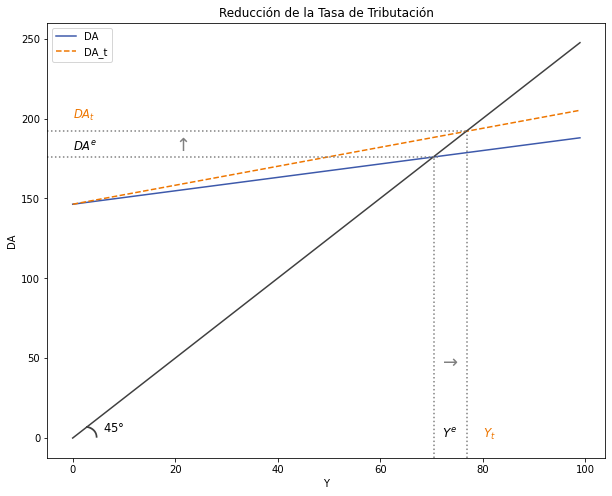

In [38]:
# Gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(Y, DA_IS_K, label = "DA", color = "#3D59AB") #curva ORIGINAL
ax.plot(Y, DA_t, label = "DA_t", color = "#EE7600", linestyle = 'dashed') #NUEVA curva
ax.plot(Y, L_45, color = "#404040") #línea de 45º

# Lineas punteadas
plt.axvline(x = 70.5, ymin= 0, ymax = 0.69, linestyle = ":", color = "grey")
plt.axhline(y = 176, xmin= 0, xmax = 0.7, linestyle = ":", color = "grey")
plt.axvline(x = 77,  ymin= 0, ymax = 0.75, linestyle = ":", color = "grey")
plt.axhline(y = 192, xmin= 0, xmax = 0.75, linestyle = ":", color = "grey")

# Texto agregado
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 200, '$DA_t$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(80, 0, '$Y_t$', fontsize = 12, color = '#EE7600')
plt.text(72, 45, '$→$', fontsize = 18, color = 'grey')
plt.text(20, 180, '$↑$', fontsize = 18, color = 'grey')

# Título y leyenda
ax.set(title = "Reducción de la Tasa de Tributación", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()

In [40]:
# Gráfico con movimiento

# Parámetros
Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

    # Definir ecuación y gráfico para el parámetro específico
def DA_K(t): # ecuación
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    
    # gráfico
    plt.subplots(figsize=(10, 8))
    plt.plot(Y, DA_K, label = "DA", color = "#3D59AB") #Demanda agregada
    plt.plot(Y, L_45, color = "#404040")
    plt.title('Tasa de Tributación')
    plt.legend()    
    
    # crear gráfico con movimiento/control
t_slide = widgets.FloatSlider(value = 0.3, min = 0, max = 3)  #widgets.FloatSlider(valor_inicial, min, max)
widgets.interact(DA_K, t = t_slide) #widgets.interact(nombre_función, parámetro = parámetro:_con_mov)


interactive(children=(FloatSlider(value=0.3, description='t', max=3.0), Output()), _dom_classes=('widget-inter…

<function __main__.DA_K(t)>

# IS CURVE

In [41]:
# Curves to plot
# Parameters

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)


# Equation 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (1/h)*(Co + Io + Go + Xo) - (1/h)*(1-(b-m)*(1-t))*Y
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

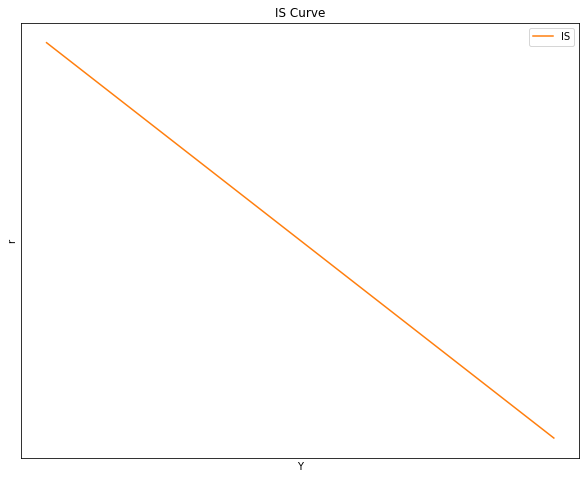

In [42]:
# Graph of the IS curve


# Dimensions
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

# Curves to plot
ax.plot(Y, r, label = "IS", color = "C1") #Demanda agregada

# Remove the quantities from the axes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Title, axes adn legend
ax.set(title = "IS Curve", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()


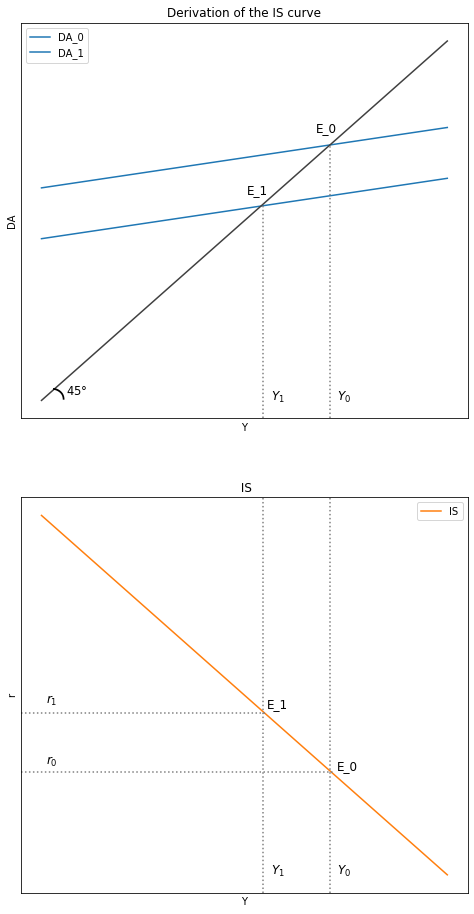

In [23]:
# Plot of the derivation of the IS curve from equality (DA = Y)

    # Two graphs in one frame
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # Graph 1: Short-Term Equilibrium Income
    
ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.plot(Y, DA_IS_K, label = "DA_0", color = "C0") 
ax1.plot(Y, DA_G, label = "DA_1", color = "C0") 
ax1.plot(Y, L_45, color = "#404040") 

ax1.axvline(x = 70.5, ymin= 0, ymax = 0.69, linestyle = ":", color = "grey")
ax1.axvline(x = 54,  ymin= 0, ymax = 0.54, linestyle = ":", color = "grey")

ax1.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
ax1.text(2.5, -3, '$◝$', fontsize = 30, color = 'black')
ax1.text(72, 0, '$Y_0$', fontsize = 12, color = 'black')
ax1.text(56, 0, '$Y_1$', fontsize = 12, color = 'black')
ax1.text(67, 185, 'E_0', fontsize = 12, color = 'black')
ax1.text(50, 142, 'E_1', fontsize = 12, color = 'black')

ax1.set(title = "Derivation of the IS curve", xlabel = r'Y', ylabel = r'DA')
ax1.legend()

#---------------------------------
    # Graph 2: IS Curve

ax2.yaxis.set_major_locator(plt.NullLocator())   
ax2.xaxis.set_major_locator(plt.NullLocator())

ax2.plot(Y, r, label = "IS", color = "C1") 

ax2.axvline(x = 70.5, ymin= 0, ymax = 1, linestyle = ":", color = "grey")
ax2.axvline(x = 54,  ymin= 0, ymax = 1, linestyle = ":", color = "grey")
plt.axhline(y = 151.5, xmin= 0, xmax = 0.7, linestyle = ":", color = "grey")
plt.axhline(y = 165, xmin= 0, xmax = 0.55, linestyle = ":", color = "grey")

ax2.text(72, 128, '$Y_0$', fontsize = 12, color = 'black')
ax2.text(56, 128, '$Y_1$', fontsize = 12, color = 'black')
ax2.text(1, 153, '$r_0$', fontsize = 12, color = 'black')
ax2.text(1, 167, '$r_1$', fontsize = 12, color = 'black')
ax2.text(72, 152, 'E_0', fontsize = 12, color = 'black')
ax2.text(55, 166, 'E_1', fontsize = 12, color = 'black')

ax2.set(title = " IS", xlabel= 'Y', ylabel= 'r')
ax2.legend()

plt.show()


In [43]:
#--------------------------------------------------
    # ORIGINAL IS Curve

# Parameters

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)


# Equation 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # New IS Curve

# Define ONLY the changed parameter
Go = 60

# Equation with the changed parameter
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


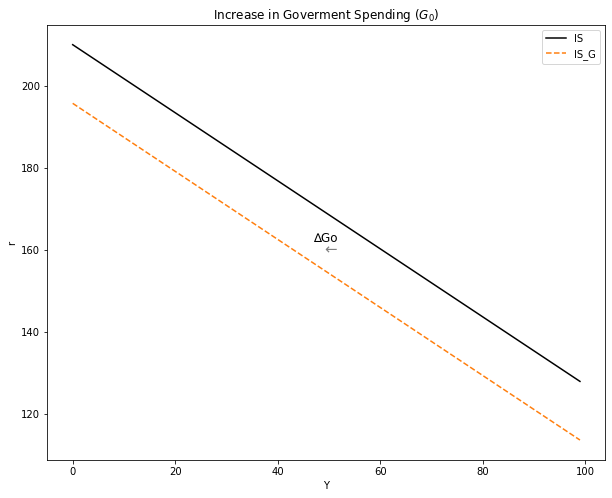

In [45]:
    # Graph

# Dimensions
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

# Curves to plot
ax.plot(Y, r, label = "IS", color = "black") #IS orginal
ax.plot(Y, r_G, label = "IS_G", color = "C1", linestyle = 'dashed') #New IS

# Text added
plt.text(47, 162, '∆Go', fontsize=12, color='black')
plt.text(49, 159, '←', fontsize=15, color='grey')

# Title and legend
ax.set(title = "Increase in Goverment Spending $(G_0)$", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()

In [50]:
#--------------------------------------------------
# ORIGINAL IS Curve

# Parameters

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)


# Equation 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # New IS Curve

# Define ONLY the changed parameter
Go = 100

# Equation with the changed parameter
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


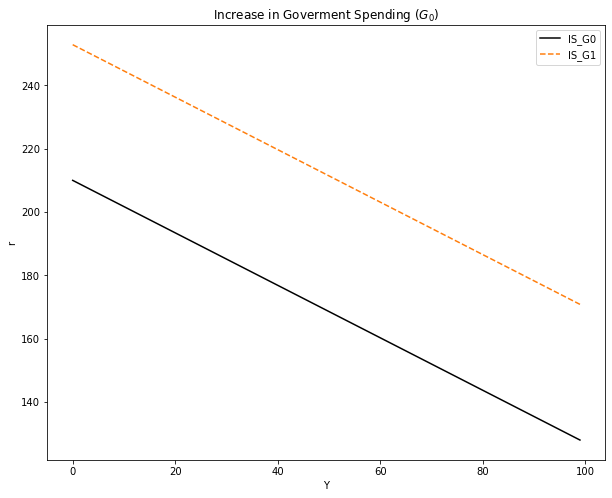

In [52]:
    # Graph

# Dimensions
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

# Curves to plot
ax.plot(Y, r, label = "IS_G0", color = "black") #IS orginal
ax.plot(Y, r_G, label = "IS_G1" , color = "C1", linestyle = 'dashed') #New IS

# Text added
# plt.text(47, 162, '∆Go', fontsize=12, color='black')
# plt.text(49, 159, '←', fontsize=15, color='grey')

# Title and legend
ax.set(title = "Increase in Goverment Spending $(G_0)$", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()

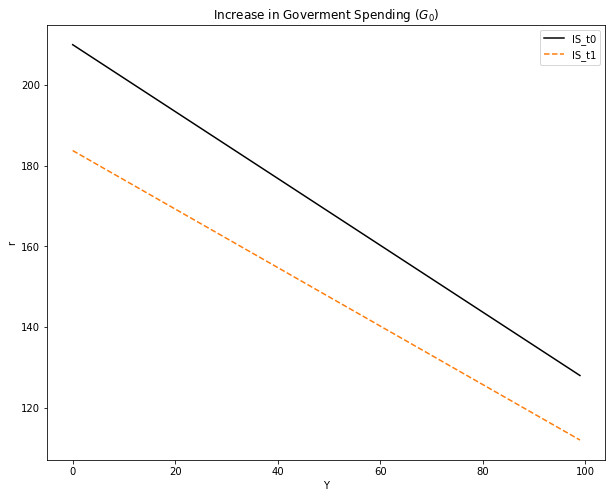

In [56]:
#--------------------------------------------------
# ORIGINAL IS Curve

# Parameters

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)


# Equation 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # New IS Curve

# Define ONLY the changed parameter
h = 0.8

# Equation with the changed parameter
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


# Graph

# Dimensions
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

# Curves to plot
ax.plot(Y, r, label = "IS_t0", color = "black") #IS orginal
ax.plot(Y, r_G, label = "IS_t1" , color = "C1", linestyle = 'dashed') #New IS

# Text added
# plt.text(47, 162, '∆Go', fontsize=12, color='black')
# plt.text(49, 159, '←', fontsize=15, color='grey')

# Title and legend
ax.set(title = "Increase in Goverment Spending $(G_0)$", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()